<a href="https://colab.research.google.com/github/monazzahshaheen/Weather-Based-Outfit-Recommendation-System/blob/main/weather_based_outfit_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the weather and clothing dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

weather_df = pd.read_csv("/content/weatherHistory.csv")
clothing_df = pd.read_csv("/content/clothing_dataset.csv")

In [ ]:
clothing_df.head(15)

,Item Name,Category,Material,Warmth Level,Temperature Range
0,Thermal Underwear,Undergarment,Wool Blend,5,-60 to -30
1,Expedition Parka,Outerwear,Down Feather,5,-60 to -30
2,Insulated Snow Pants,Bottom,Synthetic Fill,5,-60 to -30
3,Fur-Lined Boots,Footwear,Leather & Fur,5,-60 to -30
4,Balaclava,Accessory,Fleece,5,-60 to -30
5,Heavy Wool Coat,Outerwear,Wool,5,-30 to -10
6,Thermal Leggings,Bottom,Fleece,4,-30 to -10
7,Winter Gloves,Accessory,Leather & Wool,4,-30 to -10
8,Thick Wool Socks,Accessory,Wool,4,-30 to -10
9,Waterproof Snow Boots,Footwear,Synthetic,4,-30 to -10


In [ ]:
weather_df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


# Cleaning and Preprocessing the weather dataset

In [ ]:
# Encode categorical columns ('Summary' and 'Precip Type')
label_encoder_summary = LabelEncoder()
label_encoder_precip = LabelEncoder()

weather_df["Summary"] = label_encoder_summary.fit_transform(weather_df["Summary"])
weather_df["Precip Type"] = label_encoder_precip.fit_transform(weather_df["Precip Type"].astype(str))

# Save Preprocessed Weather Dataset
weather_df.to_csv("weather_preprocessed.csv", index=False)

In [ ]:
weather_df["Summary"].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

# Process Clothing dataset

In [ ]:
# Convert 'Temperature Range' to numerical min/max values
clothing_df[["Min Temp", "Max Temp"]] = clothing_df["Temperature Range"].str.split(" to ", expand=True).astype(int)

# Drop the original 'Temperature Range' column
clothing_df.drop(columns=["Temperature Range"], inplace=True)

# Save Preprocessed Clothing Dataset
clothing_df.to_csv("clothing_preprocessed.csv", index=False)

# Print success message
print("✅ Preprocessing completed. Cleaned datasets saved as 'weather_preprocessed.csv' and 'clothing_preprocessed.csv'.")


✅ Preprocessing completed. Cleaned datasets saved as 'weather_preprocessed.csv' and 'clothing_preprocessed.csv'.


# Merging the clothing and weather dataset

In [ ]:
import pandas as pd

# Load the preprocessed datasets
weather_df = pd.read_csv("weather_preprocessed.csv")
clothing_df = pd.read_csv("clothing_preprocessed.csv")

# Function to match clothing based on temperature range
def match_clothing(temp):
    matched_clothes = clothing_df[(clothing_df["Min Temp"] <= temp) & (clothing_df["Max Temp"] >= temp)]

    # If multiple matches exist, combine them into a single string
    if not matched_clothes.empty:
        return ", ".join(matched_clothes["Item Name"].tolist())
    else:
        return "No Match"

# Apply the function to match clothing for each weather condition
weather_df["Recommended Outfit"] = weather_df["Temperature (C)"].apply(lambda temp: match_clothing(temp))

# Save the corrected merged dataset
merged_file = "merged_weather_clothing.csv"
weather_df.to_csv(merged_file, index=False)

print(f"✅ Merged dataset saved as {merged_file}")

✅ Merged dataset saved as merged_weather_clothing.csv


In [ ]:
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Recommended Outfit
0,2006-04-01 00:00:00.000 +0200,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
1,2006-04-01 01:00:00.000 +0200,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
2,2006-04-01 02:00:00.000 +0200,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
3,2006-04-01 03:00:00.000 +0200,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
4,2006-04-01 04:00:00.000 +0200,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,"Breathable Shirt, Linen Shorts, Sun Hat, Sanda..."
96449,2016-09-09 20:00:00.000 +0200,19,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,"Denim Jacket, Cotton Trousers, Polo Shirt, Loa..."
96450,2016-09-09 21:00:00.000 +0200,19,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,"Denim Jacket, Cotton Trousers, Polo Shirt, Loa..."
96451,2016-09-09 22:00:00.000 +0200,19,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,"Denim Jacket, Cotton Trousers, Polo Shirt, Loa..."


In [ ]:
weather_df["Recommended Outfit"].unique()

array(['Light Jacket, Chinos, Sweatshirt, Sneakers, Cap',
       'Denim Jacket, Cotton Trousers, Polo Shirt, Loafers, Sunglasses',
       'Puffer Jacket, Jeans, Fleece Hoodie, Ankle Boots, Scarf',
       'Light Jacket, Chinos, Sweatshirt, Sneakers, Cap, Denim Jacket, Cotton Trousers, Polo Shirt, Loafers, Sunglasses',
       'Breathable Shirt, Linen Shorts, Sun Hat, Sandals, Tank Top',
       'Puffer Jacket, Jeans, Fleece Hoodie, Ankle Boots, Scarf, Light Jacket, Chinos, Sweatshirt, Sneakers, Cap',
       'Denim Jacket, Cotton Trousers, Polo Shirt, Loafers, Sunglasses, Breathable Shirt, Linen Shorts, Sun Hat, Sandals, Tank Top',
       'Heavy Wool Coat, Thermal Leggings, Winter Gloves, Thick Wool Socks, Waterproof Snow Boots',
       'Heavy Wool Coat, Thermal Leggings, Winter Gloves, Thick Wool Socks, Waterproof Snow Boots, Puffer Jacket, Jeans, Fleece Hoodie, Ankle Boots, Scarf',
       'Loose-Fit T-Shirt, Lightweight Shorts, Flip-Flops, UV Protection Shirt, Baseball Cap',
       'Brea

# Check for Missing Values

In [ ]:
file_path = "merged_weather_clothing.csv"
df = pd.read_csv(file_path)

# Check for missing values
print(df.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Recommended Outfit          0
dtype: int64


In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Recommended Outfit
0,2006-04-01 00:00:00.000 +0200,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
1,2006-04-01 01:00:00.000 +0200,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
2,2006-04-01 02:00:00.000 +0200,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
3,2006-04-01 03:00:00.000 +0200,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
4,2006-04-01 04:00:00.000 +0200,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,"Light Jacket, Chinos, Sweatshirt, Sneakers, Cap"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,"Breathable Shirt, Linen Shorts, Sun Hat, Sanda..."
96449,2016-09-09 20:00:00.000 +0200,19,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,"Denim Jacket, Cotton Trousers, Polo Shirt, Loa..."
96450,2016-09-09 21:00:00.000 +0200,19,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,"Denim Jacket, Cotton Trousers, Polo Shirt, Loa..."
96451,2016-09-09 22:00:00.000 +0200,19,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,"Denim Jacket, Cotton Trousers, Polo Shirt, Loa..."


# Preparing data for training

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the outfit labels into numbers (if not already done)
le = LabelEncoder()
df['Outfit_Label'] = le.fit_transform(df['Recommended Outfit'])

# Features (X) and Target (y)
X = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]  # You can add more features if available
y = df['Outfit_Label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 99.99%


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")


Decision Tree Accuracy: 99.99%


# SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


SVM Accuracy: 97.67%


# Accuracy graph\

In [ ]:
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


Random Forest Accuracy: 99.99%
Decision Tree Accuracy: 99.99%
SVM Accuracy: 97.67%


In [ ]:
from google.colab import files
import joblib

joblib.dump(model, 'outfit_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

# Download the files
files.download('outfit_model.pkl')
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
temp_input = 20
pred = model.predict([[temp_input]])
outfit = le.inverse_transform(pred)[0]
print(f"Recommended outfit for {temp_input}°C: {outfit}")


Recommended outfit for 20°C: Denim Jacket, Cotton Trousers, Polo Shirt, Loafers, Sunglasses


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Visualizing the accuracy graph

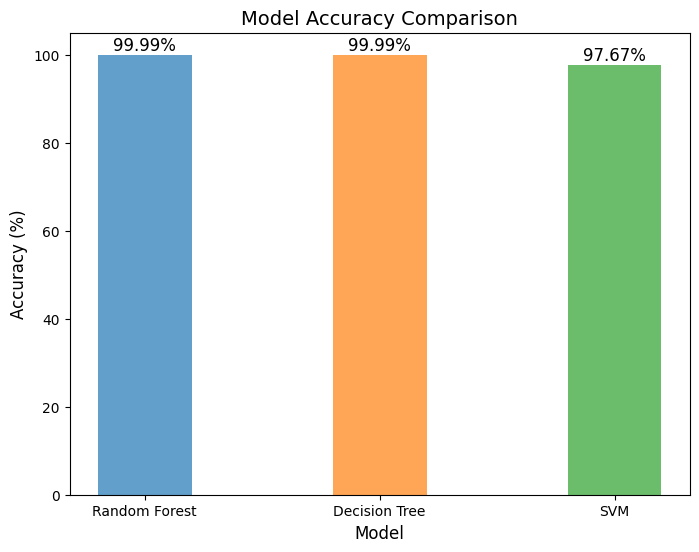

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy scores
models = ['Random Forest', 'Decision Tree', 'SVM']
accuracies = [rf_accuracy * 100, dt_accuracy * 100, svm_accuracy * 100]

# Create a bar plot with adjusted width, transparency, and colors
plt.figure(figsize=(8, 6))

# Bar plot: Adjust the width (0.4) and add alpha for transparency
bars = plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.4, alpha=0.7)

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12)

# Show the plot
plt.show()

